In [ ]:
import tensorflow
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train , y_train) , (X_test , y_test ) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
classes = ['airplane' , 'automobile' , 'bird', 'cat' , 'deer' , 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

'automobile'

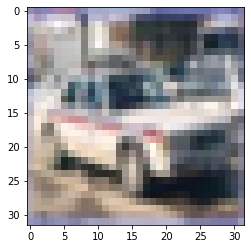

In [ ]:
plt.imshow(X_train[65])
classes[y_train[65][0]]  

In [ ]:
X_train , X_test = X_train/255 , X_test/255

In [ ]:
# 1. model architecture

model = Sequential()


# conv layer 1
model.add(Conv2D(10 , 3 , activation='relu' , kernel_initializer='he_normal'))
model.add(MaxPool2D())

# conv layer 2
model.add(Conv2D(25 , 4 , activation='relu' , kernel_initializer='he_uniform'))
model.add(MaxPool2D())

# conv layer 3
model.add(Conv2D(40 , 3 , activation='relu' , kernel_initializer='he_uniform'))
model.add(MaxPool2D())

# flatten
model.add(Flatten())

# hidden layer 1
model.add(Dense(128, activation='sigmoid'))

# hidden layer 2
model.add(Dense(64, activation='relu'))

# hidden layer 3
model.add(Dense(32, activation='sigmoid'))

#output
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam' , loss = tensorflow.keras.losses.SparseCategoricalCrossentropy() , metrics=['accuracy'])

In [ ]:
model.fit(X_train , y_train , epochs=20 , batch_size=32)

Epoch 1/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7412 - accuracy: 0.3483
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3882 - accuracy: 0.4957
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2495 - accuracy: 0.5509
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1534 - accuracy: 0.5877
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0787 - accuracy: 0.6155
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0197 - accuracy: 0.6394
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9735 - accuracy: 0.6568
Epoch 8/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9302 - accuracy: 0.6724
Epoch 9/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8888 - accuracy: 0.6867
Epoch 10/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.85

In [ ]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.0111 - accuracy: 0.6726


[1.0111331939697266, 0.6725999712944031]

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred[0]

array([6.8747153e-04, 4.8550408e-04, 5.1431386e-03, 8.9499813e-01,
       1.4531361e-03, 7.4746206e-02, 1.7825268e-02, 1.2259480e-03,
       2.3048448e-03, 1.1304598e-03], dtype=float32)

In [ ]:
import numpy as np
classes[np.argmax(y_pred[0])]

'cat'

In [ ]:
y_test[0]

array([3], dtype=uint8)

In [ ]:
image_row = 125

classes[np.argmax(y_pred[image_row])]

'airplane'

'airplane'

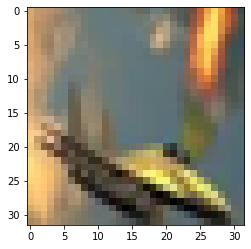

In [ ]:
plt.imshow(X_test[image_row])
classes[y_test[image_row][0]]